In [2]:
import pandas as pd
import numpy as np

In [3]:

# Load the colliders.csv file
colliders_file_path = 'colliders.csv'
colliders_df = pd.read_csv(colliders_file_path , skiprows=1)

In [4]:
# Convert relevant columns to float
colliders_df = colliders_df.astype(float)
half_size_z = []
# Define the size of the grid
min_posX = colliders_df['posX'].min()
max_posX = colliders_df['posX'].max()
min_posY = colliders_df['posY'].min()
max_posY = colliders_df['posY'].max()
min_posZ = colliders_df['posZ'].min()
max_posZ = colliders_df['posZ'].max()

grid_size = (int(max_posX - min_posX), int(max_posY - min_posY))

# Create an empty grid
grid = np.zeros(grid_size)

# Fill the grid with obstacles
for index, obstacle in colliders_df.iterrows():
    x = int(obstacle['posX'] - min_posX)
    y = int(obstacle['posY'] - min_posY)
    z = int(obstacle['posZ'] - min_posZ)
    half_size_x = int(obstacle['halfSizeX'])
    half_size_y = int(obstacle['halfSizeY'])
    half_size_z.append(int(obstacle['halfSizeZ']))
    
    grid[max(0, x-half_size_x):min(grid_size[0], x+half_size_x+1), 
         max(0, y-half_size_y):min(grid_size[1], y+half_size_y+1)] = 1

grid.shape, max_posX, min_posX, max_posY, min_posY, max_posZ

((910, 910), 599.7611, -310.2389, 470.7685, -439.2315, 106.0)

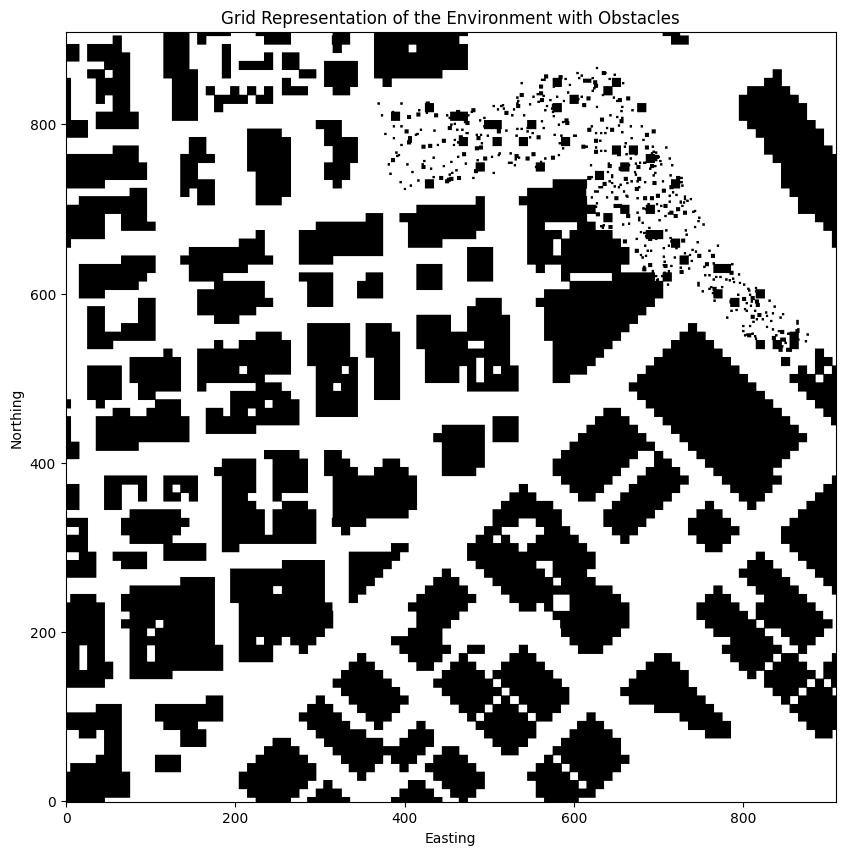

In [5]:
import matplotlib.pyplot as plt

# Plot the grid
plt.figure(figsize=(10, 10))
plt.imshow(grid, cmap='Greys', origin='lower')

# Add labels and title for better understanding
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Grid Representation of the Environment with Obstacles')

plt.show()


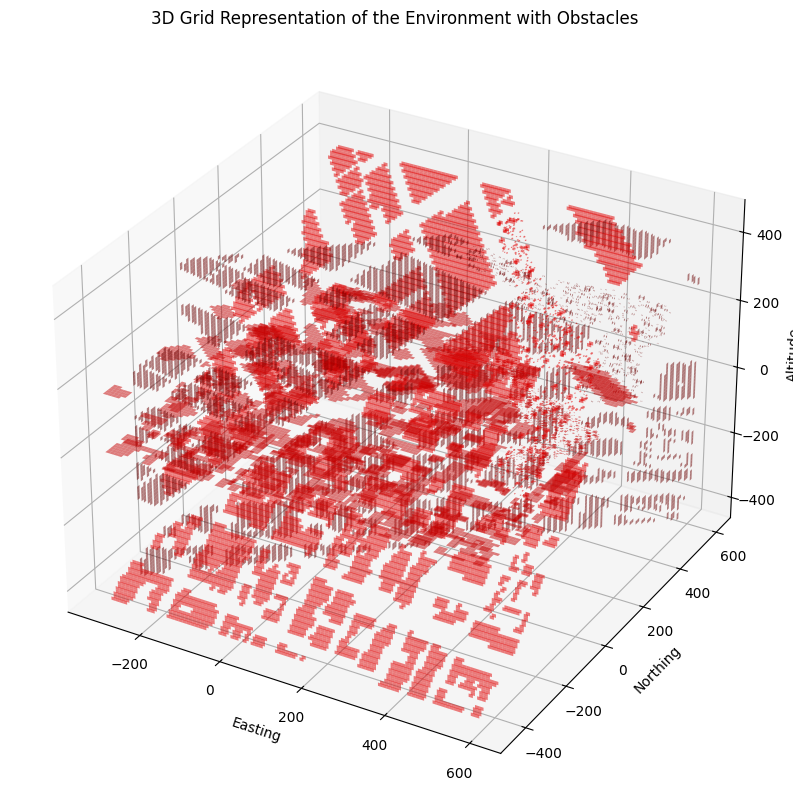

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract positions and sizes
x = colliders_df['posX'].values
y = colliders_df['posY'].values
z = colliders_df['posZ'].values
half_size_x = colliders_df['halfSizeX'].values
half_size_y = colliders_df['halfSizeY'].values
half_size_z = colliders_df['halfSizeZ'].values

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the obstacles
for i in range(len(x)):
    # Draw a cuboid for each obstacle
    x_low = x[i] - half_size_x[i]
    x_high = x[i] + half_size_x[i]
    y_low = y[i] - half_size_y[i]
    y_high = y[i] + half_size_y[i]
    z_low = z[i] - half_size_z[i]
    z_high = z[i] + half_size_z[i]
    
    xx, yy = np.meshgrid([x_low, x_high], [y_low, y_high])
    ax.plot_surface(xx, yy, z_low*np.ones_like(xx), alpha=0.5, rstride=1, cstride=1, color='red')
    ax.plot_surface(xx, yy, z_high*np.ones_like(xx), alpha=0.5, rstride=1, cstride=1, color='red')
    ax.plot_surface(xx, y_low*np.ones_like(yy), yy, alpha=0.5, rstride=1, cstride=1, color='red')
    ax.plot_surface(xx, y_high*np.ones_like(yy), yy, alpha=0.5, rstride=1, cstride=1, color='red')
    ax.plot_surface(x_low*np.ones_like(xx), xx, yy, alpha=0.5, rstride=1, cstride=1, color='red')
    ax.plot_surface(x_high*np.ones_like(xx), xx, yy, alpha=0.5, rstride=1, cstride=1, color='red')

# Set plot labels and title
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
ax.set_zlabel('Altitude')
ax.set_title('3D Grid Representation of the Environment with Obstacles')

plt.show()
